This notebook shows how to use PythTB to generate and analyze tight binding model from Wannier90 results. Written by Siyu Liao (kzmn@mail.ustc.edu.cn) under Prof. Wenhao Sun's guidance. 

In [1]:
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

$pythtb.tb\_model$ is main tight-binding model class of PythTB

Please see detailed documentation on http://www.physics.rutgers.edu/pythtb/usage.html

----- k_path report begin ----------
real-space lattice vectors
 [[2.75 2.75 0.  ]
 [0.   2.75 2.75]
 [2.75 0.   2.75]]
k-space metric tensor
 [[ 0.09917 -0.03306 -0.03306]
 [-0.03306  0.09917 -0.03306]
 [-0.03306 -0.03306  0.09917]]
internal coordinates of nodes
 [[0.    0.    0.   ]
 [0.5   0.    0.5  ]
 [0.5   0.25  0.75 ]
 [0.375 0.375 0.75 ]
 [0.    0.    0.   ]
 [0.5   0.5   0.5  ]
 [0.625 0.25  0.625]]
reciprocal-space lattice vectors
 [[ 0.18182  0.18182 -0.18182]
 [-0.18182  0.18182  0.18182]
 [ 0.18182 -0.18182  0.18182]]
cartesian coordinates of nodes
 [[ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 1.81818e-01  0.00000e+00  0.00000e+00]
 [ 1.81818e-01 -1.38778e-17  9.09091e-02]
 [ 1.36364e-01 -1.38778e-17  1.36364e-01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 9.09091e-02  9.09091e-02  9.09091e-02]
 [ 1.81818e-01  4.54545e-02  4.54545e-02]]
list of segments:
  length = 0.18182  from  [0. 0. 0.]  to  [0.5 0.  0.5]
  length = 0.09091  from  [0.5 0.  0.5]  to  [0.5  0.25 0.75]

[Text(0.0, 0, '$\\Gamma$'),
 Text(0.18181818181818182, 0, '$X$'),
 Text(0.2727272727272727, 0, '$W$'),
 Text(0.3370097073805952, 0, '$K$'),
 Text(0.5298570113405627, 0, '$\\Gamma$'),
 Text(0.6873161756650061, 0, '$L$'),
 Text(0.798656618518787, 0, '$U$')]

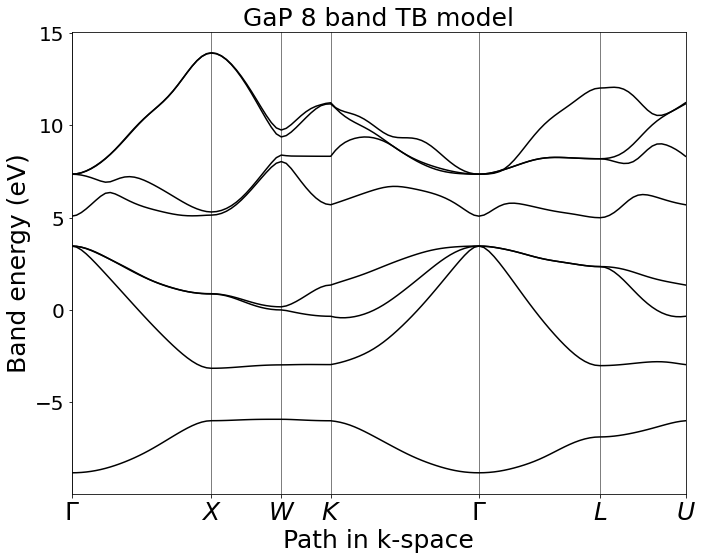

In [2]:
#import Wannier90 results
gap=w90(r"Wan_example",r"wannier90")

# get tight-binding model without hopping terms above min_hopping_norm eV
my_model=gap.model(min_hopping_norm=0.0)

# solve model on a path and plot it
path=[[0.0,0.0,0.0],[0.5,0.0, 0.5],[0.5,0.25,0.75],[0.375,0.375,0.75],
      [0.0, 0.0, 0.0],[0.5,0.5,0.5],[0.625,0.25,0.625]]

# labels of the nodes
k_label=(r'$\Gamma$', r'$X$',r'$W$', r'$K$',r'$\Gamma$',r'$L$', r'$U$')

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,127)

#solve tight binding model on the k-path 
#evals is a 2-D array which store energies of each bands along the k_path
evals=my_model.solve_all(k_vec)  

#plot tight binding model
fig, ax = plt.subplots(figsize=(11,8.5))
for i in range(evals.shape[0]):
    ax.plot(k_dist,evals[i],"k-")
for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')
ax.set_title('GaP 8 band TB model',fontsize=25)
ax.set_xlabel("Path in k-space",fontsize=25)
ax.set_ylabel("Band energy (eV)",fontsize=25)
ax.set_xlim(k_dist[0],k_dist[-1])
ax.set_xticks(k_node)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xticklabels(k_label,fontsize=25)
#fig.savefig("GaP_TBmodel.png")

Comparison of Wannier90 result and PythTB simplified model

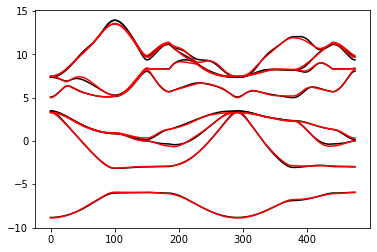

In [3]:
# get band structure from wannier90
(w90_kpt,w90_evals)=gap.w90_bands_consistency()

# get simplified model
my_model_simple=gap.model(min_hopping_norm=0.01)

# solve simplified model on the same k-path as in wannier90
evals=my_model_simple.solve_all(w90_kpt)

# plot comparison of the two TB model
fig, ax = plt.subplots() 
for i in range(evals.shape[0]):
    ax.plot(range(evals.shape[1]),evals[i],"r-",zorder=-50)
for i in range(w90_evals.shape[0]):
    ax.plot(range(w90_evals.shape[1]),w90_evals[i],"k-",zorder=-100)
#fig.savefig("Comparison.png")

Hopping parameter analysis

$dist\_hop()$ function returns all hopping terms (from orbital $i$ to $j+R$) as well as the distances between the i and j+R orbitals

$dist$ – Distances between Wannier function centers ($i$ and $j+R$) in Angstroms.

$ham$ – Corresponding hopping terms in eV.

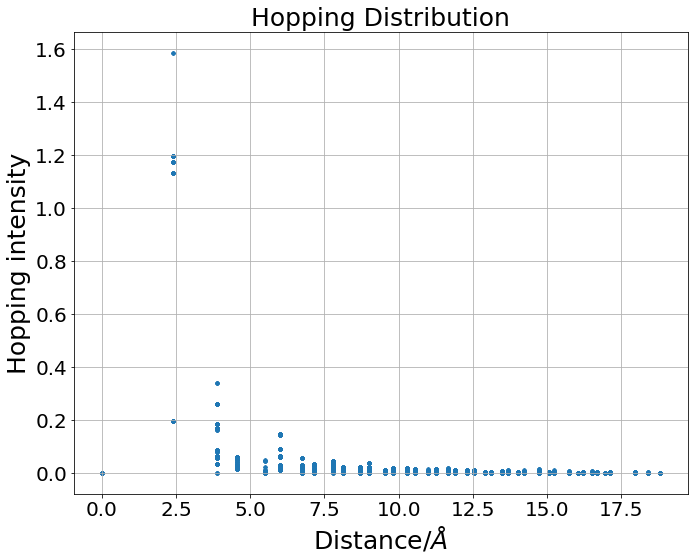

In [4]:
(dist,ham) = gap.dist_hop()
fig, ax = plt.subplots(figsize=(11,8.5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Hopping Distribution',fontsize=25)
ax.set_xlabel("Distance/$\AA$",fontsize=25)
ax.set_ylabel("Hopping intensity",fontsize=25)
ax.grid()
ax.scatter(dist,np.abs(ham),s=30,marker = '.')
#fig.savefig("abs_hopping.png")

C:\Users\Forerain\anaconda3\envs\aa\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


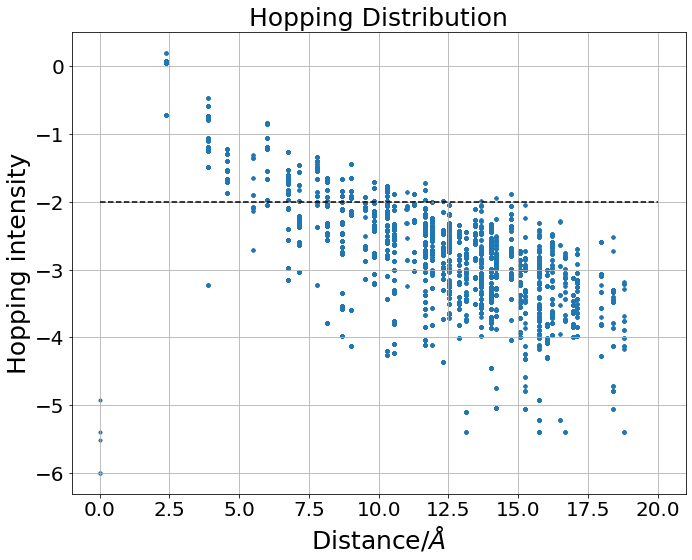

In [5]:
#Take denary logarithm on hopping intensity
(dist,ham) = gap.dist_hop()
fig, ax = plt.subplots(figsize=(11,8.5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_title('Hopping Distribution',fontsize=25)
ax.set_xlabel("Distance/$\AA$",fontsize=25)
ax.set_ylabel("Hopping intensity",fontsize=25)
ax.grid()
ax.hlines(-2,0,20,linestyles="dashed", color="black")
ax.scatter(dist,np.log10(np.abs(ham)),s=30,marker = '.')

Decrease the number of hopping parameters and get energies at high symmetry points

In [6]:
interval = np.linspace(0.01,1.19,1181)

total_para = []  # list of total hopping parameters when dereasing number of hopping parameters
glow = []  # list of \gamma-VBM energy
ghigh = []  # list of \gamma-CBM energy
x = []  # list of X-CBM energy
l = []  # list of L-CBM energy
band_gap = []  # list of bandgap

In [7]:
# get energies at high symmetry points

for a in interval:
    my_model=gap.model(min_hopping_norm=a)

# solve model on a path and plot it
    path=[[0.0,0.0,0.0],[0.5,0.0, 0.5],[0.5,0.25,0.75], [0.375,0.375,0.75], [0.0, 0.0, 0.0],
      [0.5,0.5,0.5],[0.625,0.25,0.625]]
# labels of the nodes
    k_label=(r'$\Gamma$', r'$X$',r'$W$', r'$K$',r'$\Gamma$',r'$L$', r'$U$')
# call function k_path to construct the actual path
    (k_vec,k_dist,k_node)=my_model.k_path(path,127,report=False)
    evals=my_model.solve_all(k_vec)
    
    # my_model._hoppings store all the hopping information
    total_para.append(len(my_model._hoppings)) 
    
    # positions of these values are decided by how many kpoints you set in k_path function
    # You can check them on 'node index list'. Here I set them manually
    glow.append(max(evals[3]))
    ghigh.append(evals[4][0])
    x.append(evals[4][29])
    l.append(evals[4][108])
    band_gap.append(min(evals[4])-max(evals[3]))

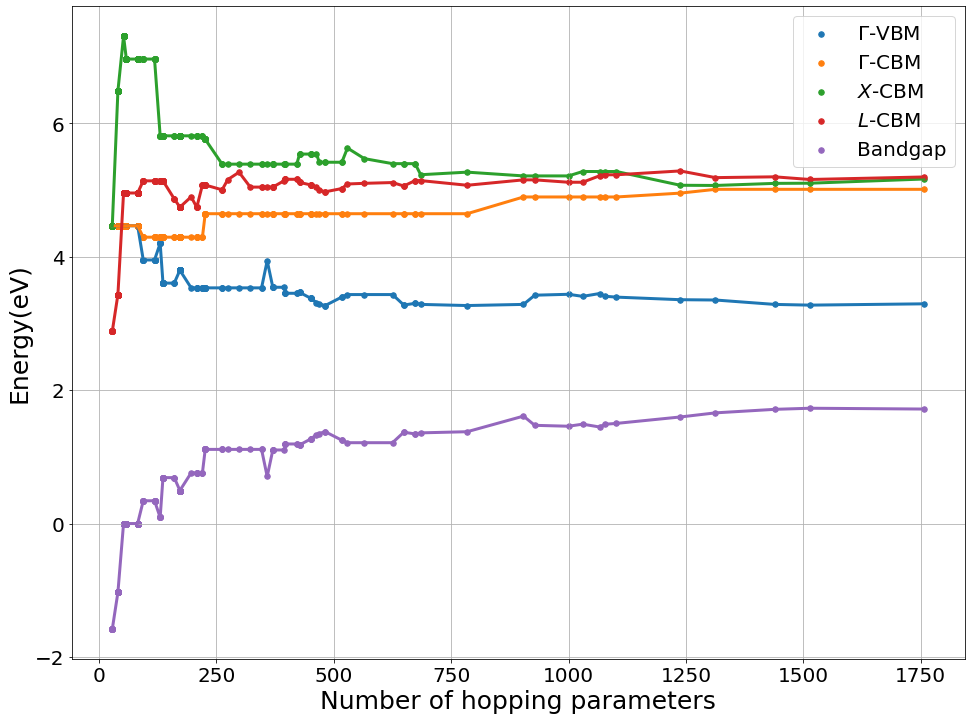

In [8]:
# plot the trend
fig, ax = plt.subplots(figsize=(16,12))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("Number of hopping parameters",fontsize=25)
ax.set_ylabel("Energy(eV)",fontsize=25)
ax.grid()
ax.plot(total_para,glow,linewidth=3)
ax.plot(total_para,ghigh,linewidth=3)
ax.plot(total_para,x,linewidth=3)
ax.plot(total_para,l,linewidth=3)
ax.plot(total_para,band_gap,linewidth=3)
ax.scatter(total_para,glow,s=30,label='$\Gamma$-VBM')
ax.scatter(total_para,ghigh,s=30,label='$\Gamma$-CBM')
ax.scatter(total_para,x,s=30,label='$X$-CBM')
ax.scatter(total_para,l,s=30,label='$L$-CBM')
ax.scatter(total_para,band_gap,s=30,label='Bandgap')
plt.legend(fontsize=20)